# Temporal Analysis

Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [23]:
df = pd.read_csv("C:/Users/deval/OneDrive/Desktop/School/Projects/Temporal Analysis/archive/air_index.csv")
print(df.head())
print(df.info())

   Rank Countries         City  2022    JAN    FEB    MAR    APR    MAY  \
0     1  Pakistan       Lahore  97.4  133.0  102.5   85.6   69.3   60.9   
1     2     China        Hotan  94.3   61.7   91.6  132.7  106.2  120.5   
2     3     India      Bhiwadi  92.7  110.6   98.0  116.2  149.5  123.8   
3     4     India  Delhi (NCT)  92.6  141.0  100.9   91.0   98.0   73.2   
4     5  Pakistan     Peshawar  91.8  110.2  103.5   78.3   68.5   53.5   

     JUN  ...   AUG   SEP    OCT    NOV    DEC   2021   2020   2019   2018  \
0   52.1  ...  46.2  64.2  123.2  190.5  192.9   86.5   79.2   89.5  114.9   
1   69.5  ...  75.0  65.1   75.0   50.3  120.0  101.5  110.2  110.1  116.0   
2  102.8  ...  36.5  59.9   85.4  111.4   86.9  106.2   95.5   83.4  125.4   
3   56.2  ...  31.1  38.3   99.7  176.8  171.9   96.4   84.1   98.6  113.5   
4   56.3  ...  57.8  79.0  100.0  132.0  212.1   89.6    NaN   63.9    NaN   

    2017  
0  133.2  
1   91.9  
2    NaN  
3  108.2  
4    NaN  

[5 rows x 21 

Detecting missing values

In [25]:
temporal_df = df.drop(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], axis=1)
print(temporal_df.isnull().sum())

Rank            0
Countries       1
City            0
2022            0
2021          861
2020         3370
2019         3576
2018         4977
2017         5154
dtype: int64


Handling missing values

In [26]:
temporal_df = temporal_df.fillna(temporal_df.mean())

C:\Users\deval\AppData\Local\Temp\ipykernel_26376\2786181035.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temporal_df = temporal_df.fillna(temporal_df.mean())


Grouping by countries and cities to calcualte mean aqi

In [34]:
mean_air_quality = temporal_df.groupby(['Countries']).mean().T

C:\Users\deval\AppData\Local\Temp\ipykernel_26376\685964069.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_air_quality = temporal_df.groupby(['Countries']).mean().T


Temporal Analysis

<Figure size 600x400 with 0 Axes>

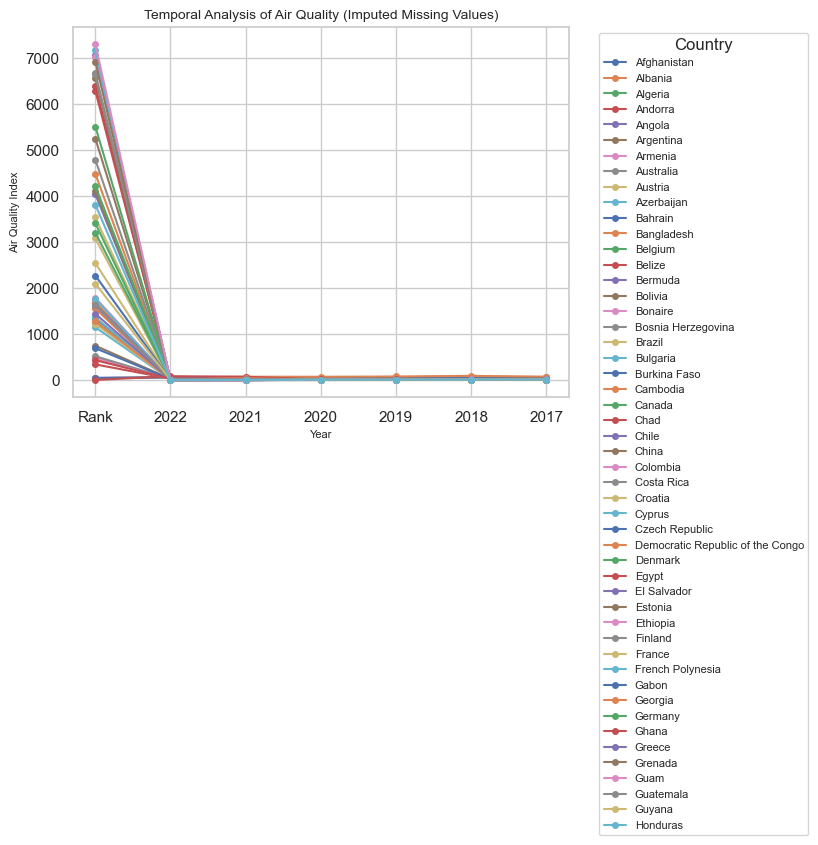

<Figure size 600x400 with 0 Axes>

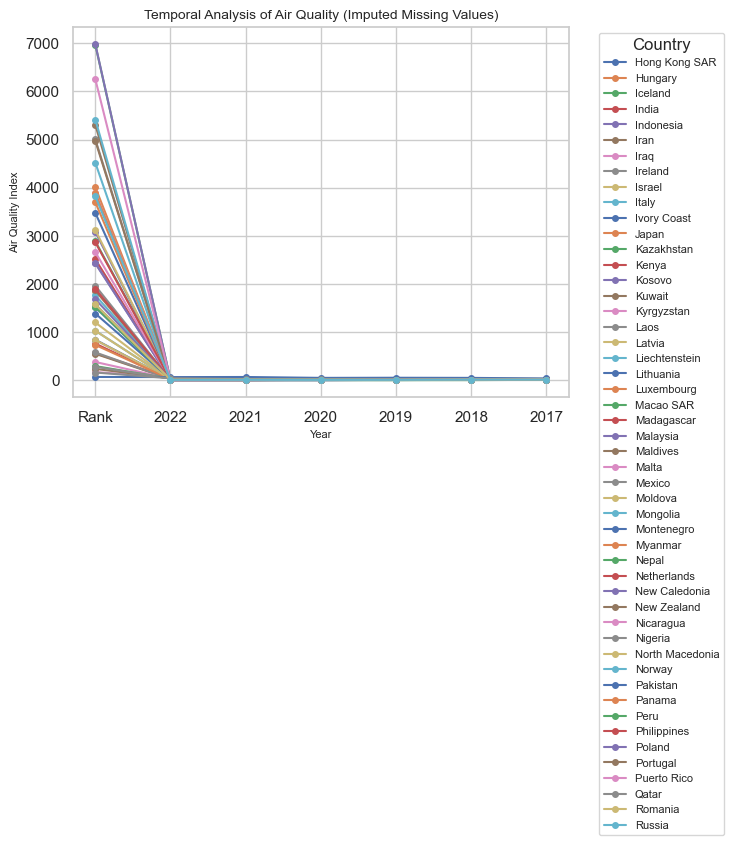

<Figure size 600x400 with 0 Axes>

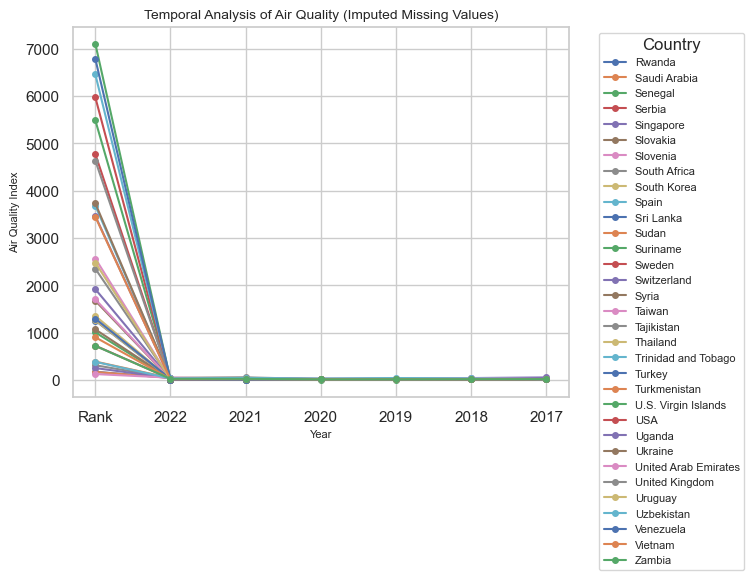

In [36]:
figure_size = (6, 4)
chunk_size = 50
sns.set(style="whitegrid")
sns.set_context("notebook", rc={"font.size": 8, "axes.titlesize": 8, "axes.labelsize": 8})
for i in range(0, len(mean_air_quality.columns), chunk_size):
    plt.figure(figsize=figure_size)
    mean_air_quality.iloc[:, i:i+chunk_size].plot(marker='o', linestyle='-', markersize=4)
    plt.title('Temporal Analysis of Air Quality (Imputed Missing Values)', fontsize=10)
    plt.xlabel('Year', fontsize=8)
    plt.ylabel('Air Quality Index', fontsize=8)
    plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    plt.show()